In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import os
import shutil

musharraf99_dataset_alphabets_path = kagglehub.dataset_download('musharraf99/dataset-alphabets')

print('Data source import complete.')


In [ ]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths
dataset_path = '/kaggle/input/dataset-alphabets/dataset'
train_dir = '/kaggle/working/dataset/train'
val_dir = '/kaggle/working/dataset/val'
test_dir = '/kaggle/working/dataset/test'

# Step 1: Create directories for train, val, and test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Assuming subfolders are labeled from A to Z
for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)

    if os.path.isdir(label_path):  # Ensure it's a directory
        # Create subdirectories for this label (A-Z) in train, val, and test
        os.makedirs(os.path.join(train_dir, label), exist_ok=True)
        os.makedirs(os.path.join(val_dir, label), exist_ok=True)
        os.makedirs(os.path.join(test_dir, label), exist_ok=True)

        # Get all images for the label
        images = os.listdir(label_path)

        # Split data: 80% train, 10% val, 10% test
        train_data, val_test_data = train_test_split(images, test_size=0.2, random_state=42)
        val_data, test_data = train_test_split(val_test_data, test_size=0.5, random_state=42)

        # Move files to respective directories
        for img in train_data:
            shutil.copy(os.path.join(label_path, img), os.path.join(train_dir, label, img))

        for img in val_data:
            shutil.copy(os.path.join(label_path, img), os.path.join(val_dir, label, img))

        for img in test_data:
            shutil.copy(os.path.join(label_path, img), os.path.join(test_dir, label, img))

# Now, create ImageDataGenerators for these separate directories
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

# Sizes of datasets
print(f"Training Size: {train_generator.samples}")
print(f"Validation Size: {val_generator.samples}")
print(f"Test Size: {test_generator.samples}")


Found 25555 images belonging to 26 classes.
Found 3195 images belonging to 26 classes.
Found 3195 images belonging to 26 classes.
Training Size: 25555
Validation Size: 3195
Test Size: 3195


In [ ]:
# Check the size of the training dataset
train_size = train_generator.n
print(f'Training Data Size: {train_size}')

# Check the size of the validation dataset
val_size = val_generator.n
print(f'Validation Data Size: {val_size}')

# Check the size of the test dataset
test_size = test_generator.n
print(f'Test Data Size: {test_size}')


Training Data Size: 25558
Validation Data Size: 15971
Test Data Size: 15971


In [ ]:
# Base model

# Number of classes
n_classes = 26 # Change this to the actual number of classes in your dataset

#Input tensor
input_tensor = Input(shape=(224, 224, 3))


base_model = VGG16(include_top=False, input_tensor=input_tensor, weights='imagenet')

# Flatten the output of the base model
x = Flatten()(base_model.output)

# Add a Dropout layer
x = Dropout(0.5)(x)

# Add a Dense layer
x = Dense(256, activation='relu')(x)

# Add another Dropout layer
x = Dropout(0.5)(x)

# Add another Dense layer
x = Dense(128, activation='relu')(x)

# Output layer
output = Dense(n_classes, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=output)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         3,35

 Total params: 21,173,722 (80.77 MB)

 Trainable params: 21,173,722 (80.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Freeze the layers of the VGG16 model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         3,35

 Total params: 21,173,722 (80.77 MB)

 Trainable params: 6,459,034 (24.64 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729061422.730664     173 service.cc:145] XLA service 0x7fad2000dc20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729061422.730748     173 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/799 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.0547 - loss: 3.8508   

I0000 00:00:1729061434.301467     173 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


799/799 ━━━━━━━━━━━━━━━━━━━━ 130s 145ms/step - accuracy: 0.8955 - loss: 0.4019 - val_accuracy: 0.9901 - val_loss: 0.0485
Epoch 2/100
799/799 ━━━━━━━━━━━━━━━━━━━━ 67s 83ms/step - accuracy: 0.9815 - loss: 0.0618 - val_accuracy: 0.9950 - val_loss: 0.0163
Epoch 3/100
799/799 ━━━━━━━━━━━━━━━━━━━━ 67s 83ms/step - accuracy: 0.9897 - loss: 0.0368 - val_accuracy: 0.9948 - val_loss: 0.0205
Epoch 4/100
799/799 ━━━━━━━━━━━━━━━━━━━━ 66s 83ms/step - accuracy: 0.9913 - loss: 0.0464 - val_accuracy: 0.9966 - val_loss: 0.0226
Epoch 5/100
799/799 ━━━━━━━━━━━━━━━━━━━━ 67s 84ms/step - accuracy: 0.9930 - loss: 0.0363 - val_accuracy: 0.9925 - val_loss: 0.0549
Epoch 6/100
799/799 ━━━━━━━━━━━━━━━━━━━━ 67s 83ms/step - accuracy: 0.9931 - loss: 0.0417 - val_accuracy: 0.9919 - val_loss: 0.0565
Epoch 7/100
799/799 ━━━━━━━━━━━━━━━━━━━━ 67s 83ms/step - accuracy: 0.9922 - loss: 0.0601 - val_accuracy: 0.9942 - val_loss: 0.0320
Epoch 8/100
799/799 ━━━━━━━━━━━━━━━━━━━━ 67s 83ms/step - accuracy: 0.9950 - loss: 0.0381 - va

In [ ]:
# After training the model
model.save('/kaggle/working/my_model.h5')  # Saves the model in HDF5 format


In [ ]:
!zip -r /kaggle/working/my_model.zip /kaggle/working/my_model


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


	zip warning: name not matched: /kaggle/working/my_model

zip error: Nothing to do! (try: zip -r /kaggle/working/my_model.zip . -i /kaggle/working/my_model)


In [ ]:
import pickle

# Assuming `model` is your trained model
with open('/kaggle/working/my_model_vgg16.pkl', 'wb') as file:
    pickle.dump(model, file)


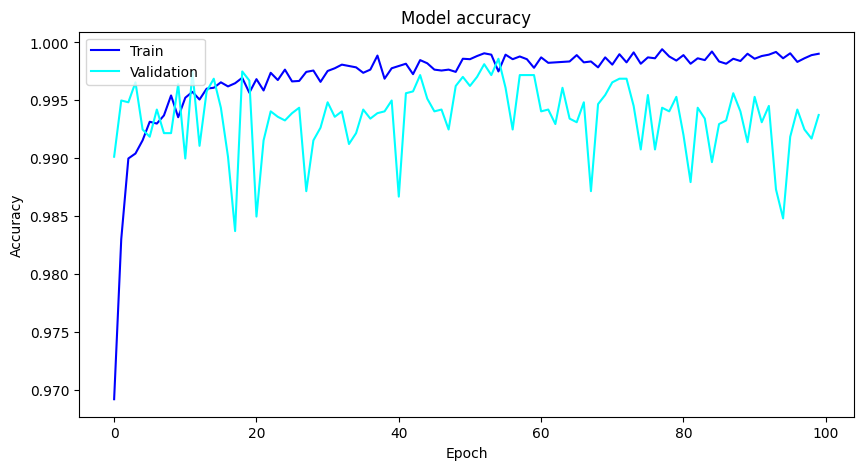

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(10, 5))


plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='cyan')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


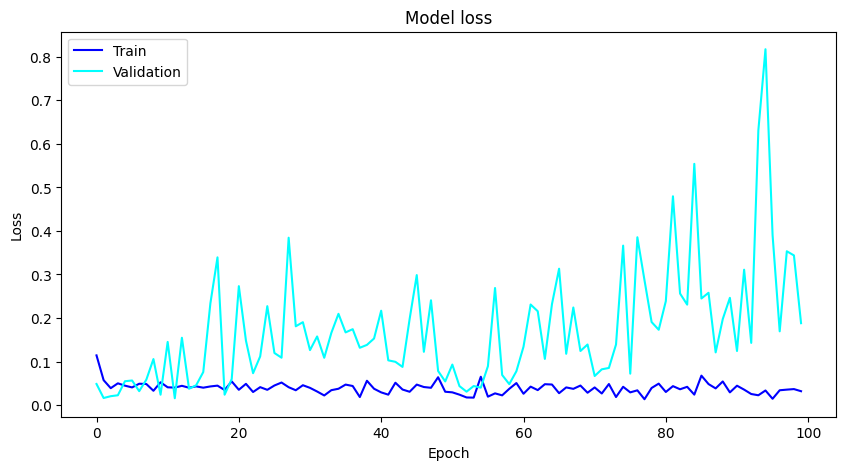

In [ ]:
# Plot training & validation loss values

plt.figure(figsize=(10, 5))

plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='cyan')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
test_dir = '/kaggle/working/dataset/test'  # Your test directory path

# Parameters
batch_size = 32
image_size = (224, 224)

# Step 1: Create ImageDataGenerator for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalizing the data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'binary' for 2 classes
    shuffle=False  # Set to False to avoid shuffling while predicting
)

# Initialize y_true list
y_true = []
# Check if test_generator has batches
if len(test_generator) > 0:
    for i in range(len(test_generator)):
        _, y = test_generator[i]
        y_true.append(np.argmax(y, axis=1))
else:
    raise ValueError("Test generator has no batches.")

# Check if y_true is populated
if not y_true:
    raise ValueError("y_true is empty. Check the test_generator output.")

y_true = np.concatenate(y_true)

# Get predicted labels
y_pred_classes = np.argmax(model.predict(test_generator, steps=len(test_generator)), axis=1)

# Ensure lengths match
if len(y_true) != len(y_pred_classes):
    raise ValueError(f"Length mismatch: y_true({len(y_true)}), y_pred_classes({len(y_pred_classes)})")

# Compute precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred_classes, average='weighted')

# Calculate the number of correct predictions
correct_predictions = np.sum(y_pred_classes == y_true)

# Calculate the total number of predictions
total_predictions = len(y_true)

# Calculate the accuracy
accuracy = correct_predictions / total_predictions

print(f'Test Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')


Found 3195 images belonging to 26 classes.
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 120ms/step
Test Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       145
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       120
           6       1.00      1.00      1.00       120
           7       1.00      1.00      1.00       120
           8       0.98      1.00      0.99       138
           9       1.00      1.00      1.00       120
          10       1.00      1.00      1.00       120
          11       1.00      1.00      1.00       120
          12       1.00      1.00      1.00       120
          13       1.00      1.00      1.00       120
          14       1.00      1.00      1.00       143
          15       1.00      1.00      1.00       120
          16       1.00      1.00      1.00       120
          17       1.00    

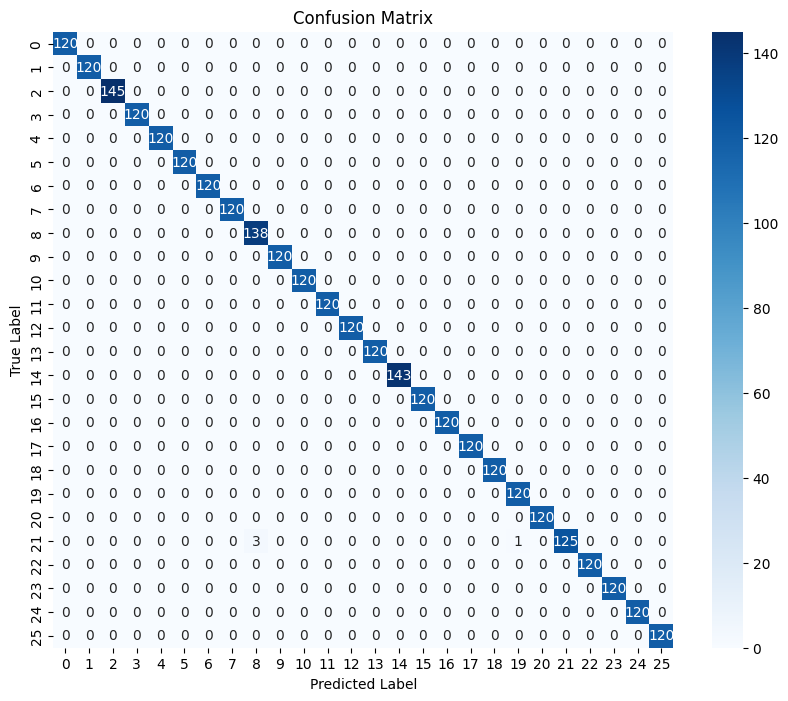

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming n_classes is set to the correct number of classes (24 in this case)
n_classes = 26

# Ensure target_names matches the number of classes
target_names = [str(i) for i in range(n_classes)]

# Display classification report
report = classification_report(y_true, y_pred_classes, target_names=target_names)
print(report)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
